In [1]:
# Σε αυτό το πρώτο βήμα εισάγω τις βιβλιοθήκες που χρησιμοποιώ για να εξάγω πληροφορίες
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
file_a = "delta.xlsx"
file_b = "entersoft.csv"

In [3]:
# Το αρχείο που έχω παραλάβει απο τον προμηθευτή είναι το delta.xlsx και το τοποθετώ στον ίδιο φάκελο με το αρχείο JupyterNotebook
df_customer = pd.read_excel(file_a)

In [4]:
# Συνήθως τα αρχεία προς ανάλυση περιέχουν πολλές εγγραφές και είναι αδύνατο να τα μελετήσουμε απλώς κοιτώντας τα.
# Όμως μπορούμε να δούμε τις πρώτες εγγραφές για να πάρουμε μια πρώτη εικόνα.
df_customer.head()

,BARCODE,ΠΕΡΙΓΡΑΦΗ,ΤΙΜΗ
0,5201037507752,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ 1ΛΤ,2.71
1,5201037507738,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ ΧΩΡΙΣ ΖΑΧΑΡΗ 1ΛΤ,2.71
2,5201037507745,ΔΕΛΤΑ ΡΟΦΗΜΑ ΚΑΡΥΔΑ 1ΛΤ,2.71
3,5201037507905,ΔΕΛΤΑ ΡΟΦΗΜΑ ΒΡΩΜΗ & 3 SUPER ΣΠΟΡΟΙ 1ΛΤ,2.71
4,5201037508261,ΔΕΛΤΑ ΦΥΤ. ΡΟΦ. ΑΜΥΓΔΑΛΟ ΚΑΚΑΟ 500ML,1.74


In [5]:
# Τώρα που είδαμε τις πρώτες εγγραφές, ίσως να θέλουμε να δούμε το σχήμα του dataframe.
df_customer.shape

(124, 3)

In [6]:
# Το αρχείο από τη βάση δεδομένων μας, το έχουμε αποθηκεύσει στον ίδιο φάκελο με την ονομασία enteroft.csv
entersoft = pd.read_csv(file_b)

In [7]:
# Θα δούμε τις πρώτες εγγραφές για να πάρουμε μια πρώτη εικόνα.
entersoft.head()

,BARCODE,RETAIL,VAT
0,5201037403283,2.99,2
1,5201037403306,2.85,2
2,5201037403368,3.40,2
3,5201037403887,3.40,2
4,5201037404068,3.30,2


In [8]:
entersoft.shape

(81, 3)

In [9]:
# Όλα τα είδη είναι στο 13% ΦΠΑ
entersoft['RETAIL_NO_VAT'] = round(entersoft.RETAIL / 1.13, 2)
entersoft.head()
# Μπορούμε να δούμε το πλήθος των διαφορετικών κατηγοριών ΦΠΑ με την παρακάτω εντολή
# entersoft.VAT.value_counts()

,BARCODE,RETAIL,VAT,RETAIL_NO_VAT
0,5201037403283,2.99,2,2.65
1,5201037403306,2.85,2,2.52
2,5201037403368,3.40,2,3.01
3,5201037403887,3.40,2,3.01
4,5201037404068,3.30,2,2.92


In [10]:
# Σε αυτό το σημείο θα συνενώσουμε τα δεδομένα για να πάρουμε μια ενιαία πληροφόρηση
final_df = pd.merge(entersoft, df_customer, how='right', left_on='BARCODE', right_on="BARCODE")

In [11]:
# Θα δούμε τις πρώτες εγγραφές για να δούμε το τελικό αποτέλεσμα
final_df.head()

,BARCODE,RETAIL,VAT,RETAIL_NO_VAT,ΠΕΡΙΓΡΑΦΗ,ΤΙΜΗ
0,5201037507752,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ 1ΛΤ,2.71
1,5201037507738,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ ΧΩΡΙΣ ΖΑΧΑΡΗ 1ΛΤ,2.71
2,5201037507745,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΚΑΡΥΔΑ 1ΛΤ,2.71
3,5201037507905,3.35,2.0,2.96,ΔΕΛΤΑ ΡΟΦΗΜΑ ΒΡΩΜΗ & 3 SUPER ΣΠΟΡΟΙ 1ΛΤ,2.71
4,5201037508261,NaN,NaN,NaN,ΔΕΛΤΑ ΦΥΤ. ΡΟΦ. ΑΜΥΓΔΑΛΟ ΚΑΚΑΟ 500ML,1.74


In [12]:
final_df.shape

(124, 6)

In [13]:
# Αν όλοι οι κωδικοί είναι 124 και οι κωδικοί που δουλεύουμε είναι 81, τότε τι ποσοστό κωδικών δουλεύουμε?
x = round(100 * (81/124), 2)
x

65.32

In [14]:
# Ας προσεγγίσουμε το ίδιο ερώτημα με μια διαφορετική φόρμουλα
round(100 - (final_df.RETAIL.isnull().sum() / final_df.shape[0] ) * 100, 2)

66.13

In [15]:
# Τα αποτελέσματα είναι διαφορετικά και εως εκ τούτου θα χρειαστεί να προχωρήσουμε σε περαιτέρω ελέγχους.
# Το αρχείο περιέχει 124 γραμμές.
# Έχουμε αποφασίσει ότι το κλειδί μας είναι η στήλη με το όνομα BARCODE.
# Θέλουμε να δούμε αν υπάρχουν διπλές εγγραφές.
df_customer.BARCODE.value_counts().max()

2

In [16]:
# Βρέθηκαν διπλές εγγραφές, προχωράμε σε διαγραφή των διπλό καταχωρήσεων
# Περιμένουμε το σχήμα να αλλάξει
df_customer.drop_duplicates(inplace=True)
df_customer.shape

(123, 3)

In [17]:
# Σε αυτό το σημείο θα συνενώσουμε ΞΑΝΑ τα δεδομένα για να πάρουμε μια ενιαία πληροφόρηση
final_df = pd.merge(entersoft, df_customer, how='right', left_on='BARCODE', right_on="BARCODE")

In [18]:
# Θα δούμε τις πρώτες εγγραφές για να δούμε το τελικό αποτέλεσμα
final_df.head()

,BARCODE,RETAIL,VAT,RETAIL_NO_VAT,ΠΕΡΙΓΡΑΦΗ,ΤΙΜΗ
0,5201037507752,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ 1ΛΤ,2.71
1,5201037507738,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ ΧΩΡΙΣ ΖΑΧΑΡΗ 1ΛΤ,2.71
2,5201037507745,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΚΑΡΥΔΑ 1ΛΤ,2.71
3,5201037507905,3.35,2.0,2.96,ΔΕΛΤΑ ΡΟΦΗΜΑ ΒΡΩΜΗ & 3 SUPER ΣΠΟΡΟΙ 1ΛΤ,2.71
4,5201037508261,NaN,NaN,NaN,ΔΕΛΤΑ ΦΥΤ. ΡΟΦ. ΑΜΥΓΔΑΛΟ ΚΑΚΑΟ 500ML,1.74


In [19]:
final_df.shape

(123, 6)

In [20]:
# Αν όλοι οι κωδικοί είναι 123 και οι κωδικοί που δουλεύουμε είναι 81, τότε τι ποσοστό κωδικών δουλεύουμε?
x = round(100 * (81/123), 2)
x

65.85

In [21]:
# Ας προσεγγίσουμε το ίδιο ερώτημα με μια διαφορετική φόρμουλα
round(100 - (final_df.RETAIL.isnull().sum() / final_df.shape[0] ) * 100, 2)

65.85

In [22]:
# Το επόμενο βήμα είναι να διαγράψω τους κωδικούς που δε δουλέυω.
# Αποθηκεύω το αποτέλεσμα σε ένα νέο DF
final_df.dropna(inplace=True)

In [23]:
#  Θα δούμε τις πρώτες εγγραφές για να δούμε το τελικό αποτέλεσμα
final_df.head()

,BARCODE,RETAIL,VAT,RETAIL_NO_VAT,ΠΕΡΙΓΡΑΦΗ,ΤΙΜΗ
0,5201037507752,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ 1ΛΤ,2.71
1,5201037507738,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ ΧΩΡΙΣ ΖΑΧΑΡΗ 1ΛΤ,2.71
2,5201037507745,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΚΑΡΥΔΑ 1ΛΤ,2.71
3,5201037507905,3.35,2.0,2.96,ΔΕΛΤΑ ΡΟΦΗΜΑ ΒΡΩΜΗ & 3 SUPER ΣΠΟΡΟΙ 1ΛΤ,2.71
5,5201037508278,1.98,2.0,1.75,ΔΕΛΤΑ ΦΥΤ. ΡΟΦ. ΦΟΥΝΤΟΥΚΙ ΚΑΚΑΟ 500ML,1.74


In [24]:
# Ας δούμε και το σχήμα. Περιμένουμε οι γραμμές να είναι σε πλήθος ίσο με τις γραμμές από τη βάση μας
final_df.shape

(81, 6)

In [25]:
# Ένας τρόπος για να ελέγξουμε αν δύο σχήματα έχουν το ίδιο μήκος είναι αυτός:
final_df.shape[0] == entersoft.shape[0]
# Αν το αποτέλεσμα είναι True τότε έχουν το ίδιο μήκος

True

In [26]:
# ΚΕΡΔΟΦΟΡΙΑ
final_df['MARKUP'] = round((final_df.RETAIL_NO_VAT / final_df['ΤΙΜΗ'] - 1) * 100, 2)
final_df.head()

,BARCODE,RETAIL,VAT,RETAIL_NO_VAT,ΠΕΡΙΓΡΑΦΗ,ΤΙΜΗ,MARKUP
0,5201037507752,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ 1ΛΤ,2.71,23.99
1,5201037507738,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΑΜΥΓΔΑΛΟ ΧΩΡΙΣ ΖΑΧΑΡΗ 1ΛΤ,2.71,23.99
2,5201037507745,3.80,2.0,3.36,ΔΕΛΤΑ ΡΟΦΗΜΑ ΚΑΡΥΔΑ 1ΛΤ,2.71,23.99
3,5201037507905,3.35,2.0,2.96,ΔΕΛΤΑ ΡΟΦΗΜΑ ΒΡΩΜΗ & 3 SUPER ΣΠΟΡΟΙ 1ΛΤ,2.71,9.23
5,5201037508278,1.98,2.0,1.75,ΔΕΛΤΑ ΦΥΤ. ΡΟΦ. ΦΟΥΝΤΟΥΚΙ ΚΑΚΑΟ 500ML,1.74,0.57


In [27]:
# σπάμε τις τιμές σε Τεταρτημόρια και τις αποτυπώνουμε
retail_price = final_df['RETAIL']
quartiles = np.quantile(retail_price, [0, .25, .5, .75, 1])
quartiles

array([1.1 , 1.85, 2.75, 3.4 , 7.85])

In [28]:
# Σε κάθε τεταρτημόριο βρίσκουμε το πλήθος των εγγραφών
count_quartiles = [len(final_df[final_df['RETAIL'] < quartiles[1]]),
                   len(final_df[(final_df['RETAIL'] >= quartiles[1]) & (final_df['RETAIL'] < quartiles[2])]),
                   len(final_df[(final_df['RETAIL'] >= quartiles[2]) & (final_df['RETAIL'] < quartiles[3])]),
                   len(final_df[(final_df['RETAIL'] >= quartiles[3])])]
count_quartiles

[18, 20, 19, 24]

In [29]:
# Προσδιορίζω το ποσοστό που αντιστοιχεί σε κάθε τεταρτημόριο
np_count_quartiles = np.asarray(count_quartiles)
x = np.round((np_count_quartiles / sum(count_quartiles)) * 100, 2)
x

array([22.22, 24.69, 23.46, 29.63])

In [30]:
# Βρίσκω τη μέση τιμή
round(final_df['RETAIL'].mean(0), 2)

2.85

In [31]:
# Βρίσκω την επικρατούσα τιμή
final_df['RETAIL'].mode()
# final_df['RETAIL'].value_counts()

0    1.55
1    2.75
2    3.80
3    3.95
Name: RETAIL, dtype: float64

In [32]:
# Βρίσκω τον διάμεσο
final_df['RETAIL'].median()

2.75

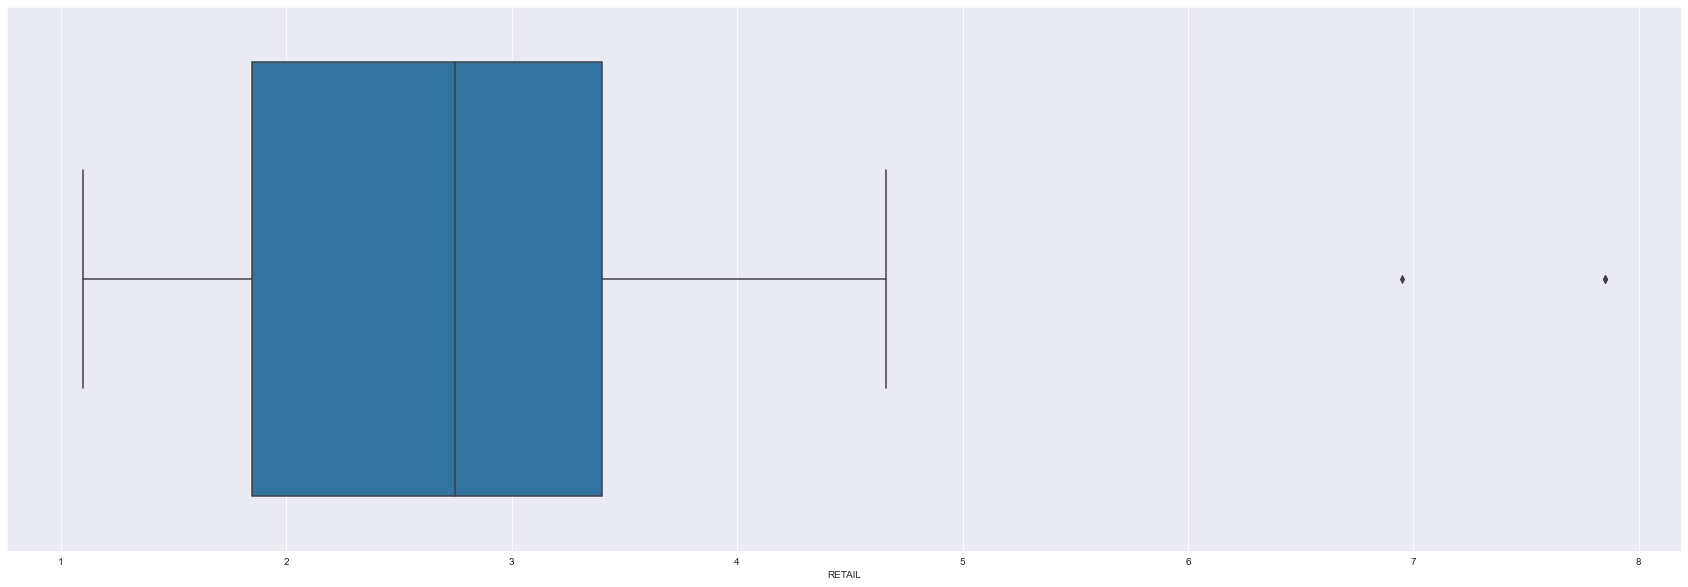

In [33]:
plt.figure(figsize=[30,10])
boxplot = sns.boxplot(x='RETAIL', data=final_df)
boxplot = sns.stripplot(x=final_df['RETAIL'], marker="X", alpha=1, color='red', order=['RETAIL'])
plt.show()

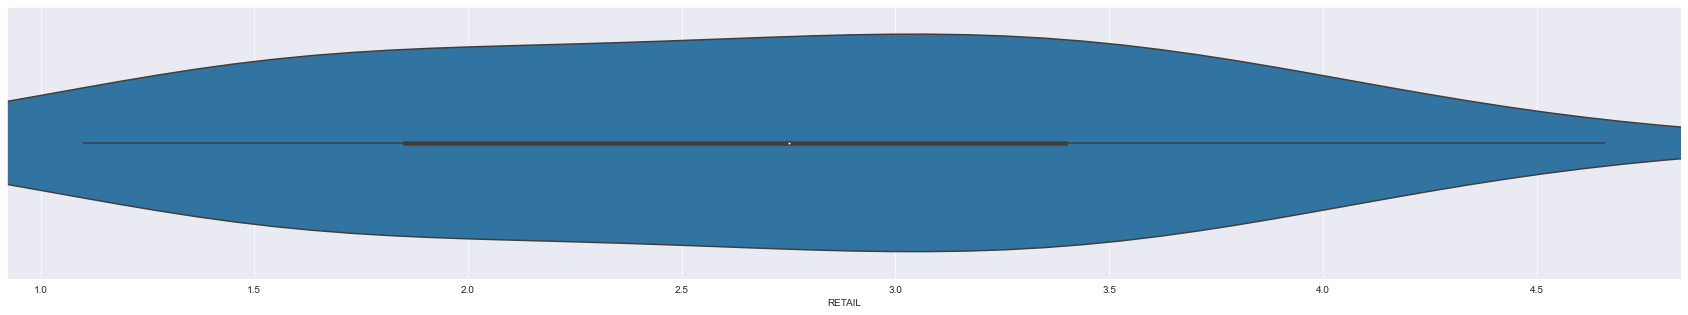

In [34]:
plt.figure(figsize=[30,5])
boxplot = sns.violinplot(x=final_df['RETAIL'])
boxplot = sns.stripplot(x=final_df['RETAIL'], marker="X", alpha=1, color='red', order=['RETAIL'])
plt.show()